# Probability Notebook

## Index:
1. Discrete Random Variable
2. Binomial Distribution
3. Geometric Distribution
4. Negative Binomial Distribution
5. Poisson
6. Bernoulli (Same as Binom, but for a single event rather than repeated event)

In [11]:
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.io as pio
import math
pio.renderers.default = "notebook_connected"

In [8]:
x = [0, 1, 2, 3]
probs = [.4, .1, .1, .4]

fig = px.bar(x=x, y=probs)
fig.show()

In [13]:
mean = 0
entropy = 0
variance = 0

for i in range(len(x)):
    mean += x[i]*probs[i]
    entropy += probs[i] * math.log10(probs[i])
entropy = entropy*-1

for i in range(len(x)):
    variance += (probs[i] - mean)**2
    
mean, variance, entropy


(1.5000000000000002, 6.340000000000001, 0.5183520069376302)

In [20]:
def weighted_mean(x, probabilities):
    """
    Calculates the weighted mean of a discrete random variable
    """
    if len(x) != len(probabilities):
        raise "There must be a probability for each value of the random variable"

    mean = 0
    for i in range(len(x)):
        mean += x[i]*probabilities[i]
    return mean

def variance(x, x_mean, probabilities):
    """
    Calculates the variance of a discrete random variable
    """

    if len(x) != len(probabilities):
        raise "There must be a probability for each value of the random variable"

    variance = 0
    for i in range(len(x)):
        variance += probabilities[i] * ((x[i] - x_mean)**2)
    return variance

def entropy(probabilities):
    """
    Calculates the entropy of a discrete random variable
    """
    entropy = 0
    for i in range(len(probabilities)):
        if probabilities[i] == 0:
            continue
        entropy += probabilities[i] * math.log10(probabilities[i])
    return entropy*-1



In [21]:
x = np.array([0, 1, 2, 3])
probs = np.array([.5, 0, 0, .5])

x_bar = weighted_mean(x, probs)
variance_x = variance(x, x_bar, probs)
entropy_x = entropy(probs)

print(x_bar, variance_x, entropy_x)

1.5 2.25 0.3010299956639812


In [23]:
x = np.array([0, 1, 2, 3])
probs = np.array([.25, .25, .25, .25])

x_bar = weighted_mean(x, probs)
variance_x = variance(x, x_bar, probs)
entropy_x = entropy(probs)

print(x_bar, variance_x, entropy_x)

1.5 1.25 0.6020599913279624


### Binomial Distributions

- Can find the values of n and p by knowing E(X) and V(X)
    - E(X) = np
    - V(X) = np(1-p)

    Which binomial distribution has mean 2 and variance 1?


In [25]:
n = 4
p = 0.5

x_bar = n*p
x_var = n*p*(1-p)

x_bar, x_var

(2.0, 1.0)

### Geometric Distribution
Process: Suppose you play a game, and win with probability $p$. Let $X$ be the number of attempts at playing the game before experiencing a win. Then $X$ is said to have a Geometric distribution.

Note:

Sometimes this family is defined so that $X$ includes the winning attempt. The properties of the distribution differ, so be sure to be deliberate about which one you use.
Since there's only one parameter, this means that if you know the mean, you also know the variance!

Code:
**scipy.stats.geom**

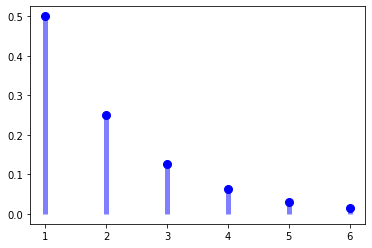

In [28]:
from scipy.stats import geom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.arange(geom.ppf(0.01, p),
              geom.ppf(0.99, p))
ax.plot(x, geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

### Negative Binomial:
Process: Suppose you play a game, and win with probability $p$. Let $X$ be the number of attempts at playing the game before experiencing $k$ wins. Then $X$ is said to have a Negative Binomial distribution.

Two parameters.
The Geometric family results with $k=1$.
Code: scipy.stats.nbinom.

### Poisson:
Process: Suppose customers independently arrive at a store at some average rate. The total number of customers having arrived after a pre-specified length of time follows a Poisson distribution, and can be parameterized by a single parameter, usually the mean $\lambda$.

A noteable property of this family is that the mean is equal to the variance.

Examples that are indicative of this process:

The number of ships that arrive at the port of Vancouver in a given day.
The number of emails you receive in a given day.

Code: scipy.stats.poisson.